In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import json
nltk.download("stopwords")

from nltk.corpus import stopwords
from string import punctuation
from nltk import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

def read_xml(file_path):
    tree = ET.parse(file_path)

    root = tree.getroot()

    data = []

    for sentence in root.findall('sentence'):
        id = sentence.get('id')
        speech = sentence.find('speech').text
        evaluation = sentence.find('evaluation').text
        url = sentence.find('url').text

        data.append([speech, evaluation])

    df = pd.DataFrame(data, columns=[ 'text', 'sentiment'])

    return df


df = read_xml('train.xml')
df

,text,sentiment
0,"\n Далее в своей проповеди он напомнил, ч...",\n 0\n
1,"\n ""Меня отпустили. У Коли @nlyaskin заби...",\n -\n
2,"\n ""Мои игроки не разочаровали меня, даже...",\n +-\n
3,"\n В интервью РИА ""Новости"" уполномоченны...",\n 0\n
4,"\n ""Психологи начнут работать с двумя дев...",\n +-\n
...,...,...
4255,"\n ""В соответствии с законодательством в ...",\n 0\n
4256,"\n ""Сам факт возбуждения дела не говорит ...",\n +-\n
4257,"\n ""Дело прекращалось, потом прокуратура ...",\n +-\n
4258,"\n А.Зеленов напомнил, что после крушения...",\n -\n


In [3]:
with open('train_emotion.json') as f:
    raw_train = json.load(f)

    part_df = pd.DataFrame(raw_train)
print(part_df.head())

                                                text    id sentiment
0  Досудебное расследование по факту покупки ЕНПФ...  1945  negative
1  Медики рассказали о состоянии пострадавшего му...  1957  negative
2  Прошел почти год, как железнодорожным оператор...  1969  negative
3  По итогам 12 месяцев 2016 года на территории р...  1973  negative
4  Астана. 21 ноября. Kazakhstan Today - Агентств...  1975  negative


In [4]:
part_df.drop("id", axis=1)

,text,sentiment
0,Досудебное расследование по факту покупки ЕНПФ...,negative
1,Медики рассказали о состоянии пострадавшего му...,negative
2,"Прошел почти год, как железнодорожным оператор...",negative
3,По итогам 12 месяцев 2016 года на территории р...,negative
4,Астана. 21 ноября. Kazakhstan Today - Агентств...,negative
...,...,...
8258,"Как мы писали еще весной, для увеличения сбыта...",positive
8259,Но молодой министр национальной экономики Биши...,negative
8260,\n \nВ ЕНПФ назначен новый председатель правле...,neutral
8261,В Алматы у отделения банка произошло нападение...,negative


In [5]:
df = pd.concat([df, part_df])

In [6]:
df['text'] = df['text'].apply(lambda x: x.strip())
df['sentiment'] = df['sentiment'].apply(lambda x: x.strip())
df

,text,sentiment,id
0,"Далее в своей проповеди он напомнил, что по би...",0,NaN
1,"""Меня отпустили. У Коли @nlyaskin забирают вещ...",-,NaN
2,"""Мои игроки не разочаровали меня, даже слегка ...",+-,NaN
3,"В интервью РИА ""Новости"" уполномоченный по пра...",0,NaN
4,"""Психологи начнут работать с двумя девушками, ...",+-,NaN
...,...,...,...
8258,"Как мы писали еще весной, для увеличения сбыта...",positive,10312.0
8259,Но молодой министр национальной экономики Биши...,negative,10313.0
8260,В ЕНПФ назначен новый председатель правления ....,neutral,10314.0
8261,В Алматы у отделения банка произошло нападение...,negative,10315.0


In [7]:
df.drop("id", axis=1)

,text,sentiment
0,"Далее в своей проповеди он напомнил, что по би...",0
1,"""Меня отпустили. У Коли @nlyaskin забирают вещ...",-
2,"""Мои игроки не разочаровали меня, даже слегка ...",+-
3,"В интервью РИА ""Новости"" уполномоченный по пра...",0
4,"""Психологи начнут работать с двумя девушками, ...",+-
...,...,...
8258,"Как мы писали еще весной, для увеличения сбыта...",positive
8259,Но молодой министр национальной экономики Биши...,negative
8260,В ЕНПФ назначен новый председатель правления ....,neutral
8261,В Алматы у отделения банка произошло нападение...,negative


In [8]:
df['sentiment'] = df['sentiment'].replace('0', 'neutral')
df['sentiment'] = df['sentiment'].replace('-', 'negative')
df['sentiment'] = df['sentiment'].replace('+', 'positive')
df = df[df['sentiment'] != '+-']
df = df[df['sentiment'] != 'neutral']
df['sentiment'].value_counts()

positive    3910
negative    3298
Name: sentiment, dtype: int64

In [9]:
df['text'].describe()

count                                                  7208
unique                                                 7199
top       Наполовину сократились продажи автопрома РК в ...
freq                                                      2
Name: text, dtype: object

In [10]:
not_string_rows = df[~df['text'].apply(lambda x: isinstance(x, str))]

print(not_string_rows)

Empty DataFrame
Columns: [text, sentiment, id]
Index: []


In [11]:
import re
from multiprocessing import Pool, cpu_count

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from pymorphy2 import MorphAnalyzer
from tqdm.notebook import tqdm

stop_words = set(stopwords.words("russian"))
morph = MorphAnalyzer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text, language='russian')
    tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [morph.parse(word)[0].normal_form for word in tokens]
    return lemmatized_tokens


def tokenize_text2words_ru(text):
    sentences = sent_tokenize(text, "russian")
    return sentences


def parallel_preprocess(text_list):
    sentences = [tokenize_text2words_ru(text) for text in text_list]
    with Pool(cpu_count()) as pool:
        result = list(
            tqdm(
                pool.imap(
                    preprocess_text,
                    [' '.join(text) for text in sentences],
                ),
                total=len(sentences),
                # sum(len(s) for s in sentences)
            )
        )
    return result

In [12]:
df['tokens'] = parallel_preprocess(df['text'])

  0%|          | 0/7208 [00:00<?, ?it/s]

In [13]:
df['sequence_length'] = df['tokens'].map(len)

In [14]:
df['sequence_length'].describe()

count     7208.000000
mean       223.707131
std        773.483136
min          3.000000
25%         22.000000
50%         94.000000
75%        230.250000
max      36713.000000
Name: sequence_length, dtype: float64

In [15]:
Q1 = np.percentile(df['sequence_length'], 25)
Q3 = np.percentile(df['sequence_length'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
df = df[(df['sequence_length'] >= lower_bound) & (df['sequence_length'] <= upper_bound)]
df['sequence_length'].describe()

-290.375
542.625


count    6639.000000
mean      120.918361
std       124.180842
min         3.000000
25%        21.000000
50%        67.000000
75%       193.000000
max       541.000000
Name: sequence_length, dtype: float64

In [16]:
MAX_LEN = 200

In [17]:
from gensim.models import Word2Vec
import multiprocessing
num_cores = multiprocessing.cpu_count()
# Word2Vec
w2v_model = Word2Vec(df['tokens'], vector_size=MAX_LEN, window=10, min_count=5, workers=num_cores, sg=1, 
    sample=0.0001)
word_vectors = w2v_model.wv

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['text_string'] = df['tokens'].apply(' '.join)

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df = 2, max_features = 100000, max_df=0.95)
X_tfidf = vectorizer.fit_transform(df['text_string'])
X_tfidf

<6639x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 961131 stored elements in Compressed Sparse Row format>

In [19]:
import numpy as np
from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm


def compute_document_vector(args):
    word2vec_model, doc = args
    return document_vector(word2vec_model, doc)

def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if not doc:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[doc], axis=0)

def parallel_document_vectors(word2vec_model, docs):
    with Pool(cpu_count()) as pool:
        args = [(word2vec_model, doc) for doc in docs]
        result = list(tqdm(pool.imap(compute_document_vector, args, chunksize=100), total=len(docs)))
    return np.array(result)



X_w2v = parallel_document_vectors(w2v_model, df['tokens'])

  0%|          | 0/6639 [00:00<?, ?it/s]

In [20]:
labels = df['sentiment']
labels
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_smote, y_train_smote = smote.fit_resample(X_tfidf, y)
X_w2v_smote, y_smote = smote.fit_resample(X_w2v, y) 

In [22]:
from sklearn.model_selection import train_test_split

#TFIDF - x-train
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_train_tfidf_smote, y_train_smote, test_size=0.2, random_state=42)
#X_w2v
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v_smote, y_smote, test_size=0.3, random_state=42)

# Regression TF-IDF

In [23]:

regressor_tfidf = LogisticRegression(max_iter=1000000, multi_class='multinomial')
regressor_tfidf.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(max_iter=1000000, multi_class='multinomial')

In [24]:
y_pred_tfidf = regressor_tfidf.predict(X_test_tfidf)

F-score: 0.892664168851261
Accuracy: 0.8929558011049724


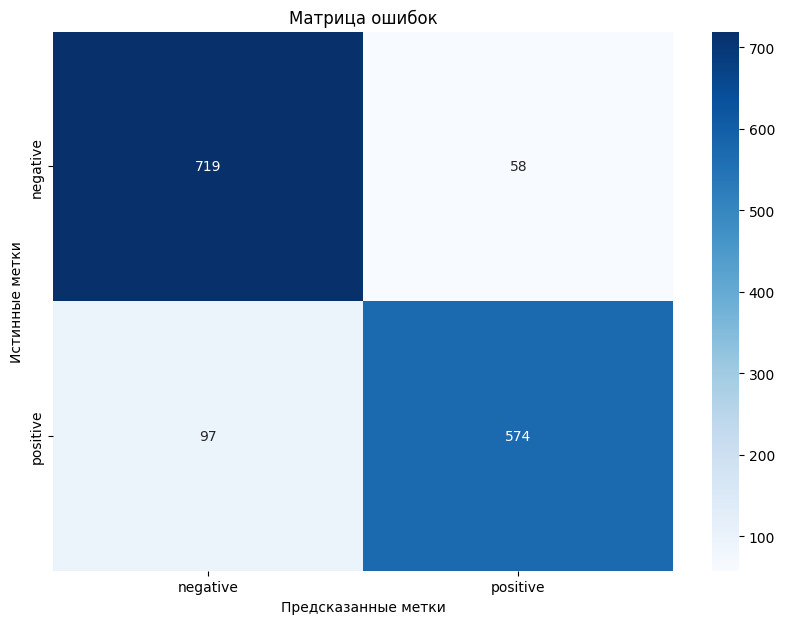

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize


f_score = f1_score(y_test_tfidf, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test_tfidf, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [26]:
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative       0.88      0.93      0.90       777
    positive       0.91      0.86      0.88       671

    accuracy                           0.89      1448
   macro avg       0.89      0.89      0.89      1448
weighted avg       0.89      0.89      0.89      1448



# Regression Word2vec

In [27]:

regressor_w2v = LogisticRegression(max_iter=10000000, multi_class='multinomial')
regressor_w2v.fit(X_train_w2v, y_train_w2v)

LogisticRegression(max_iter=10000000, multi_class='multinomial')

F-score: 0.8397136698694092
Accuracy: 0.8397790055248618


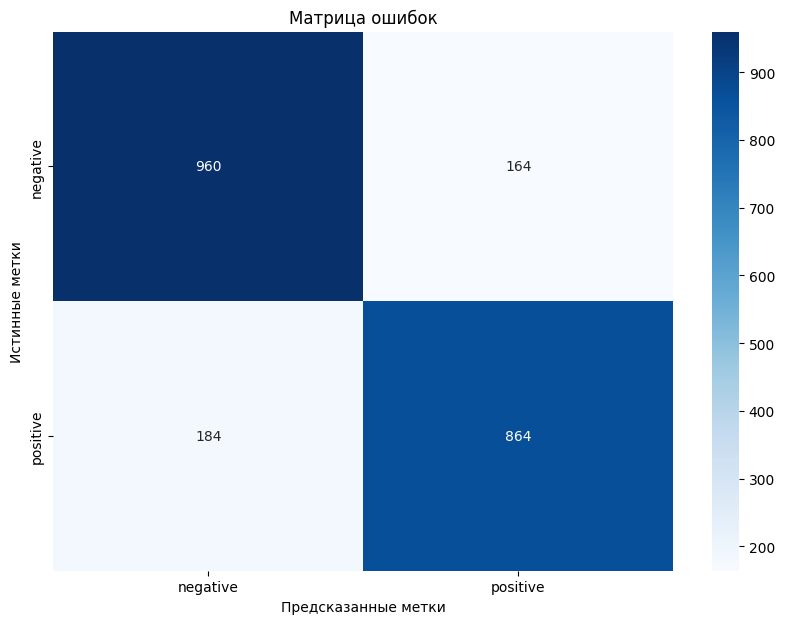

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

y_pred_w2v = regressor_w2v.predict(X_test_w2v)


f_score = f1_score(y_test_w2v, y_pred_w2v, average='weighted')
accuracy_w2v = accuracy_score(y_test_w2v, y_pred_w2v)
conf_matrix = confusion_matrix(y_test_w2v, y_pred_w2v)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [29]:
print(classification_report(y_test_w2v, y_pred_w2v, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      1124
    positive       0.84      0.82      0.83      1048

    accuracy                           0.84      2172
   macro avg       0.84      0.84      0.84      2172
weighted avg       0.84      0.84      0.84      2172



# Линейная регрессия с tf-idf

In [30]:
regressor_tfidf = LogisticRegression(max_iter=1000000, multi_class='multinomial')
regressor_tfidf.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(max_iter=1000000, multi_class='multinomial')

In [31]:
y_pred_tfidf = regressor_tfidf.predict(X_test_tfidf)

F-score: 0.892664168851261
Accuracy: 0.8929558011049724


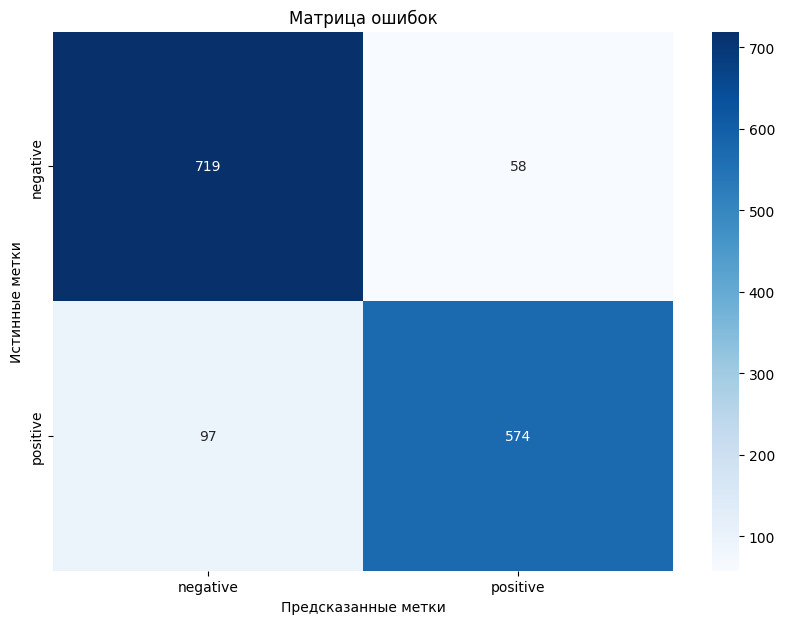

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize



f_score = f1_score(y_test_tfidf, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test_tfidf, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [33]:
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative       0.88      0.93      0.90       777
    positive       0.91      0.86      0.88       671

    accuracy                           0.89      1448
   macro avg       0.89      0.89      0.89      1448
weighted avg       0.89      0.89      0.89      1448



# Метод опорных векторов с w2v

In [34]:
from sklearn.svm import LinearSVC

svm_tfidf = LinearSVC(max_iter=1000000)
svm_tfidf.fit(X_train_w2v, y_train_w2v)



LinearSVC(max_iter=1000000)

F-score: 0.8484109185786297
Accuracy: 0.8485267034990792


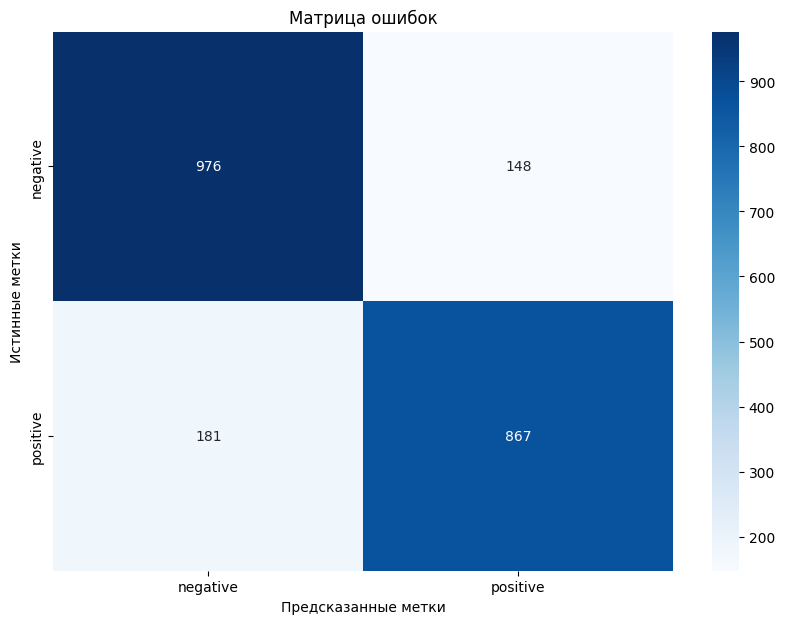

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

y_pred_tfidf = svm_tfidf.predict(X_test_w2v)

f_score = f1_score(y_test_w2v, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test_w2v, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test_w2v, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [36]:
print(classification_report(y_test_w2v, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      1124
    positive       0.85      0.83      0.84      1048

    accuracy                           0.85      2172
   macro avg       0.85      0.85      0.85      2172
weighted avg       0.85      0.85      0.85      2172



In [37]:
# Метод опорных векторов с TF-IDF

In [38]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('svm', LinearSVC(max_iter=10000))
])


In [39]:

pipeline.fit(X_train_tfidf, y_train_tfidf)



Pipeline(steps=[('svm', LinearSVC(max_iter=10000))])

In [83]:
import joblib
joblib.dump(pipeline, 'emotion.pkl')
joblib.dump(encoder, 'emotion_encoder.pkl')
joblib.dump(vectorizer, 'emotion_vectorizer_tfidf.pkl')

['emotion_vectorizer_tfidf.pkl']

F-score: 0.9043928810723115
Accuracy: 0.9046961325966851


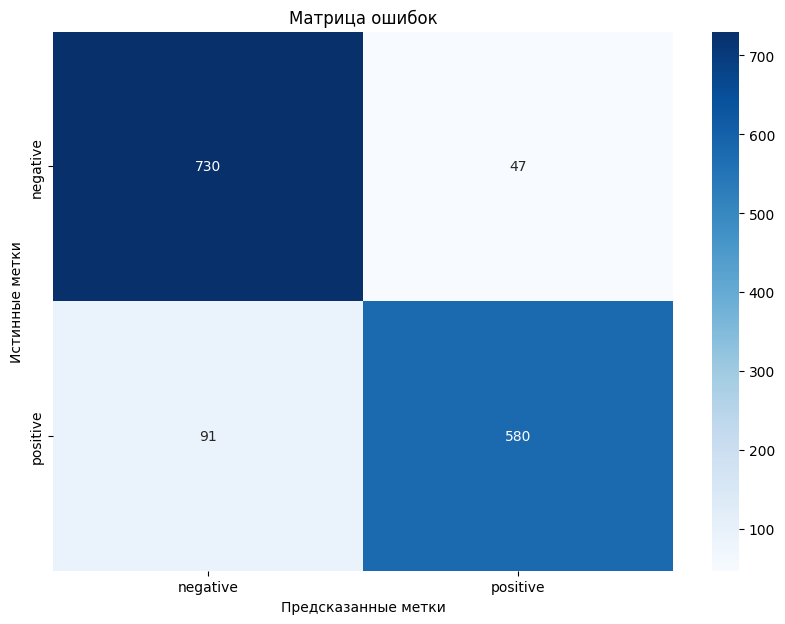

In [40]:
y_pred_tfidf = pipeline.predict(X_test_tfidf)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Расчет метрик
f_score = f1_score(y_test_tfidf, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test_tfidf, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")

# Вывод матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [41]:
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative       0.89      0.94      0.91       777
    positive       0.93      0.86      0.89       671

    accuracy                           0.90      1448
   macro avg       0.91      0.90      0.90      1448
weighted avg       0.91      0.90      0.90      1448



# Метод К-ближайших соседей с w2v

In [42]:
from sklearn.neighbors import KNeighborsClassifier

nb = KNeighborsClassifier()
nb.fit(X_train_w2v, y_train_w2v)


KNeighborsClassifier()

In [43]:
y_pred_tfidf = nb.predict(X_test_w2v)

F-score: 0.8449813565342413
Accuracy: 0.8453038674033149


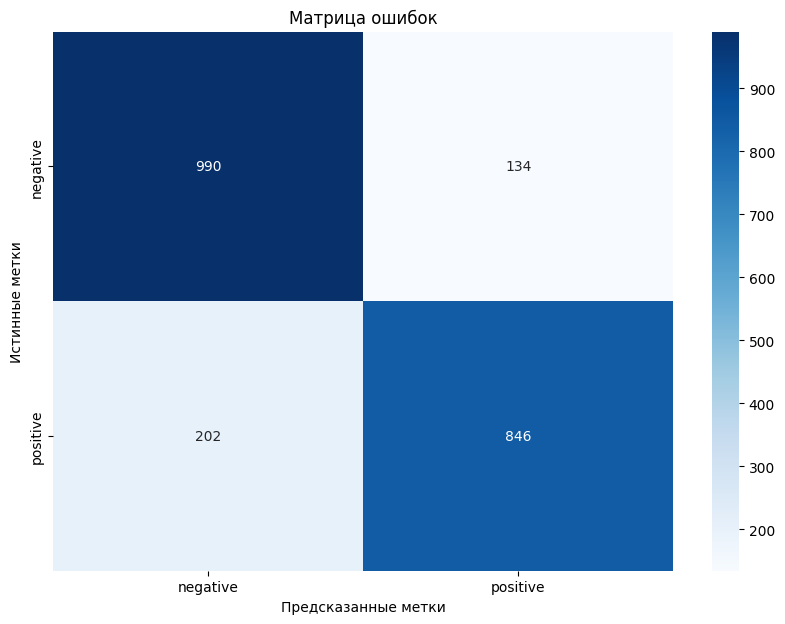

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize


f_score = f1_score(y_test_w2v, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test_w2v, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test_w2v, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [45]:
print(classification_report(y_test_w2v, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      1124
    positive       0.86      0.81      0.83      1048

    accuracy                           0.85      2172
   macro avg       0.85      0.84      0.84      2172
weighted avg       0.85      0.85      0.84      2172



# БАесовский классификатор

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

nb = MultinomialNB()


param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train_tfidf)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)


Best Parameters: {'alpha': 0.1}
Best Cross-validation Accuracy: 0.8865284974093264


In [47]:
y_pred_tfidf = grid_search.predict(X_test_tfidf)


F-score: 0.9032242612193719
Accuracy: 0.9033149171270718


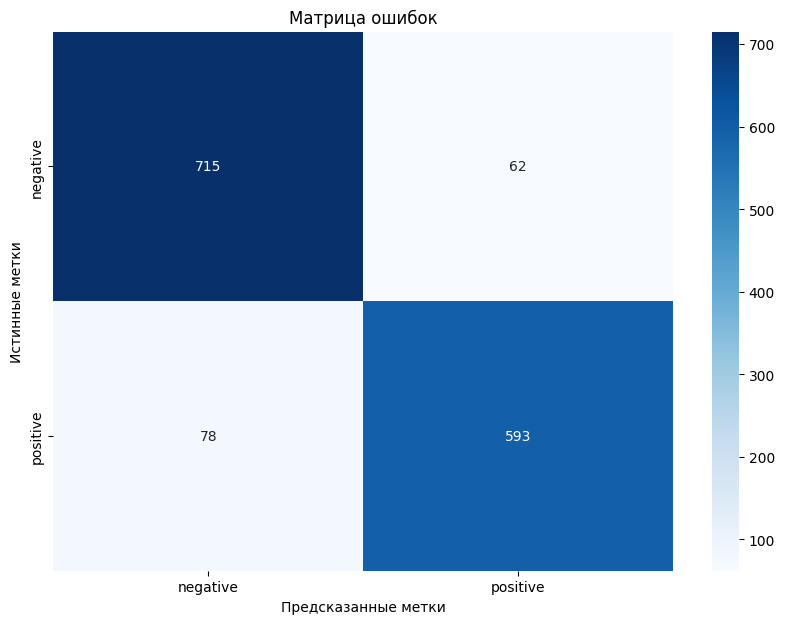

In [48]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize


f_score = f1_score(y_test_tfidf, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test_tfidf, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [49]:
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative       0.90      0.92      0.91       777
    positive       0.91      0.88      0.89       671

    accuracy                           0.90      1448
   macro avg       0.90      0.90      0.90      1448
weighted avg       0.90      0.90      0.90      1448



# DENSE с tf-idf

In [50]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['sentiment']), y=df['sentiment'])
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f'Веса классов: {class_weights_dict}')

Веса классов: {0: 1.0991721854304635, 1: 0.9172423321359492}


In [51]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_tfidf, y)
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)
y

2024-06-12 12:41:24.784886: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-12 12:41:24.791269: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-12 12:41:25.059541: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-12 12:41:26.025101: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 12:41:28.738001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

array([0, 0, 0, ..., 1, 1, 0])

In [52]:
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder

model = Sequential()
model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/home/jupyter/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-12 12:41:49.702081: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │   102,401,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,696,449 (391.76 MB)

 Trainable params: 102,696,449 (391.76 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_filename = 'dense_emotion.keras'
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5, verbose=1, mode='auto')
chkpt = ModelCheckpoint('dense_emotion.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
callbacks = [early_stop, chkpt, reduce_lr]

In [54]:
history = model.fit(X_train, y_train,  validation_data=(X_val, y_val), epochs=10, batch_size=128, class_weight=class_weights_dict, callbacks=callbacks)


Epoch 1/10


/home/jupyter/.local/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 102400000 elements. This may consume a large amount of memory.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 102400000 elements. This may consume a large amount of memory.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 102400000 elements. This may consume a large amount of memory.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 102400000 elements. This may consume a large amount of memory.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7635 - loss: 0.8294
Epoch 1: val_loss improved from inf to 0.34672, saving model to dense_emotion.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 342ms/step - accuracy: 0.7651 - loss: 0.8247 - val_accuracy: 0.8966 - val_loss: 0.3467 - learning_rate: 0.0010
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9832 - loss: 0.1415
Epoch 2: val_loss improved from 0.34672 to 0.30987, saving model to dense_emotion.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9831 - loss: 0.1411 - val_accuracy: 0.8759 - val_loss: 0.3099 - learning_rate: 0.0010
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9948 - loss: 0.0502
Epoch 3: val_loss did not improve from 0.30987
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.9948 - loss: 0.0501 - val_accuracy: 0.8805 - val_loss: 0.3105 - learning_rate: 0.0010
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9967 - loss: 0.0337
Epoch 4: val_loss did not 

In [55]:

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


Test loss: 0.265
Test accuracy: 0.903


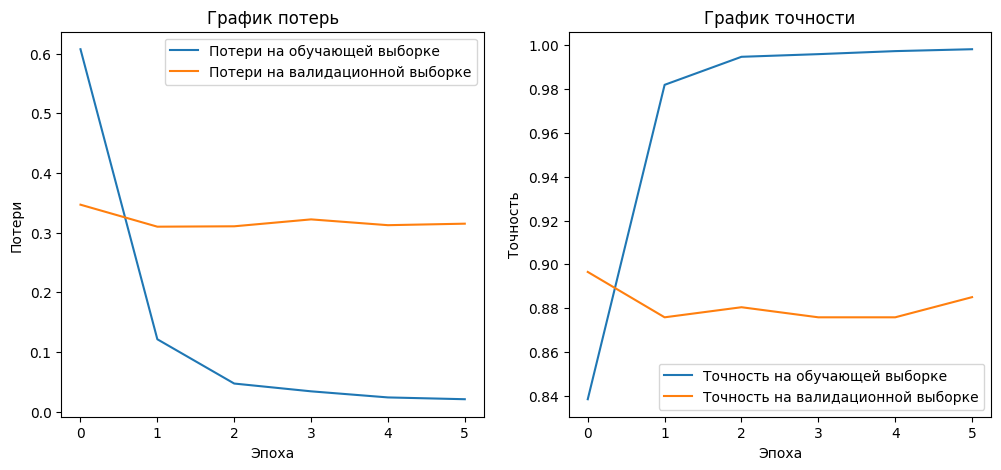

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('График потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

    negative       0.91      0.91      0.91       543
    positive       0.90      0.90      0.90       470

    accuracy                           0.90      1013
   macro avg       0.90      0.90      0.90      1013
weighted avg       0.90      0.90      0.90      1013

F-score: 0.9032576505429417
Accuracy: 0.9032576505429417


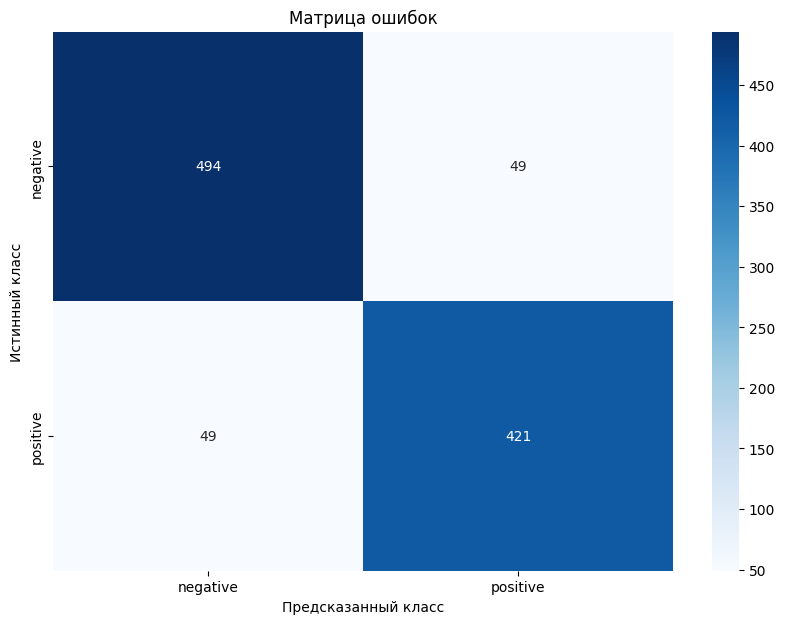

In [57]:
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) 


y_true_classes = y_test 


class_names = encoder.classes_


print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


f_score = f1_score(y_true_classes, y_pred_classes, average='weighted')
accuracy_w2v = accuracy_score(y_true_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

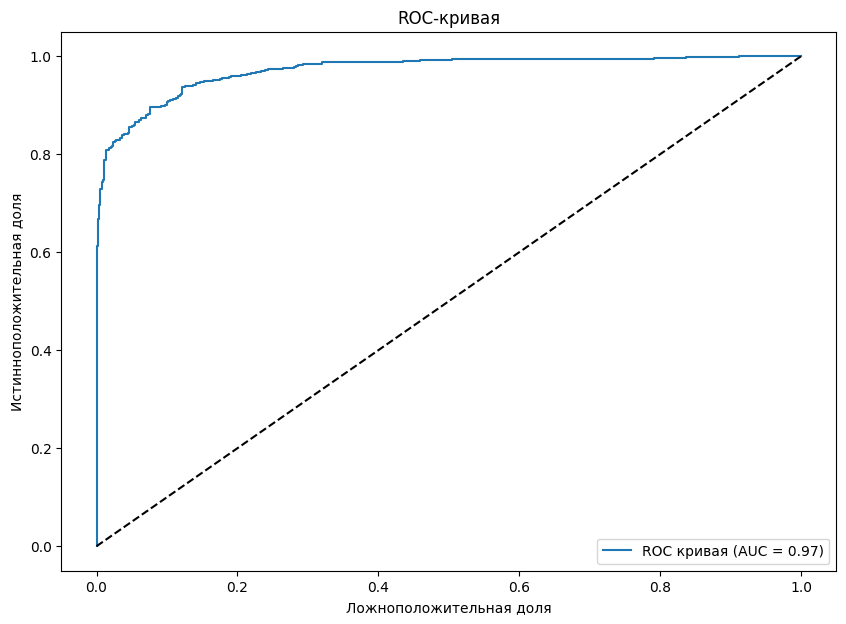

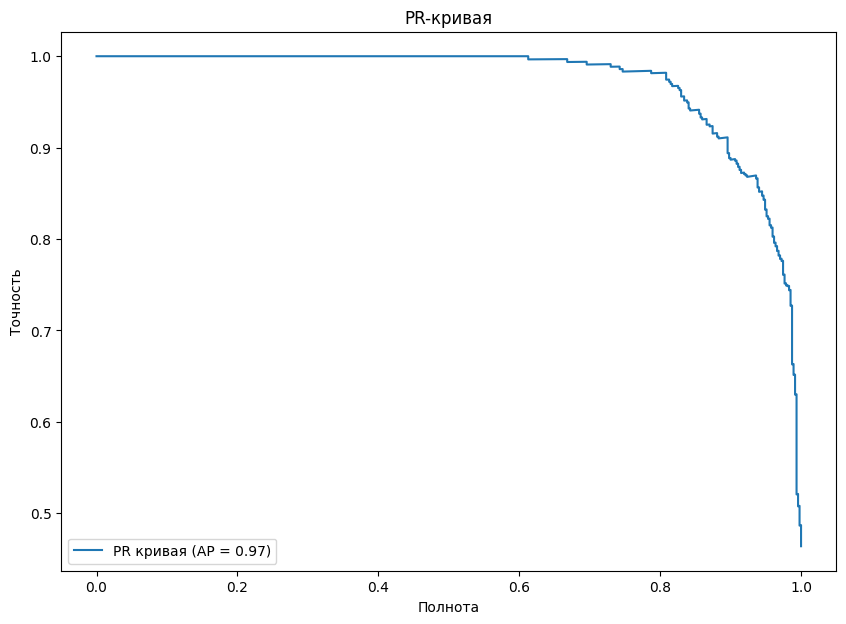

In [58]:

fpr, tpr, _ = roc_curve(y_true_classes, y_pred)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_true_classes, y_pred)
average_precision = average_precision_score(y_true_classes, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Ложноположительная доля')
plt.ylabel('Истинноположительная доля')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()


plt.figure(figsize=(10, 7))
plt.plot(recall, precision, label=f'PR кривая (AP = {average_precision:.2f})')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('PR-кривая')
plt.legend(loc='lower left')
plt.show()

# DENSE с word2vec

In [59]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np



In [60]:
from keras.utils import to_categorical

encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])


X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f'Веса классов: {class_weights_dict}')
input_shape = np.shape(X_w2v)

Веса классов: {0: 1.096407927332783, 1: 0.9191761855313257}


In [61]:
model_filename = 'dense7_class.keras'
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,
                           patience=5, verbose=1, mode='auto')
chkpt = ModelCheckpoint(model_filename,
                        monitor='val_loss',
                        verbose=1,
                        save_best_only=True,
                        mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

callbacks = [early_stop, chkpt, reduce_lr]

In [62]:
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
import numpy as np
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(200, input_dim=input_shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

/home/jupyter/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,177 (215.54 KB)

 Trainable params: 55,177 (215.54 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:

history = model.fit(X_train, y_train,  validation_data=(X_val, y_val), epochs=14, batch_size=64, class_weight=class_weights_dict, callbacks=callbacks)


Epoch 1/14
61/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4969 - loss: 0.8245  
Epoch 1: val_loss improved from inf to 0.77845, saving model to dense7_class.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5132 - loss: 0.8209 - val_accuracy: 0.6917 - val_loss: 0.7785 - learning_rate: 1.0000e-04
Epoch 2/14
70/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7219 - loss: 0.7527
Epoch 2: val_loss improved from 0.77845 to 0.67782, saving model to dense7_class.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.7482 - val_accuracy: 0.7494 - val_loss: 0.6778 - learning_rate: 1.0000e-04
Epoch 3/14
68/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7973 - loss: 0.6347
Epoch 3: val_loss improved from 0.67782 to 0.59205, saving model to dense7_class.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.6302 - val_accuracy: 0.7794 - val_loss: 0.5921 - learning_rate: 1.0000e-04
Epoch 4/14
69/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

In [64]:

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


Test loss: 0.435
Test accuracy: 0.841


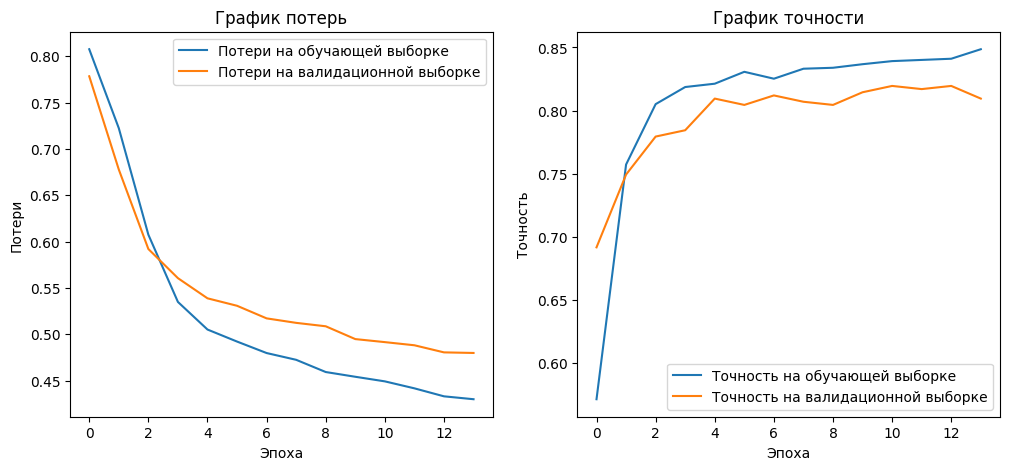

In [65]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('График потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

    negative       0.79      0.88      0.83       418
    positive       0.89      0.81      0.85       511

    accuracy                           0.84       929
   macro avg       0.84      0.84      0.84       929
weighted avg       0.85      0.84      0.84       929

F-score: 0.8410890263862283
Accuracy: 0.8406889128094726


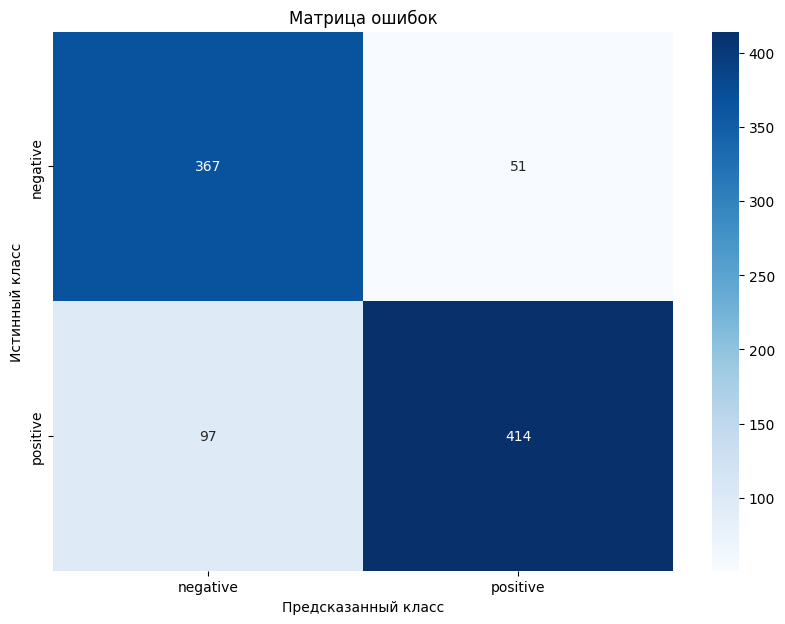

In [66]:
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) 


y_true_classes = y_test 


class_names = encoder.classes_


print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

f_score = f1_score(y_true_classes, y_pred_classes, average='weighted')
accuracy_w2v = accuracy_score(y_true_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

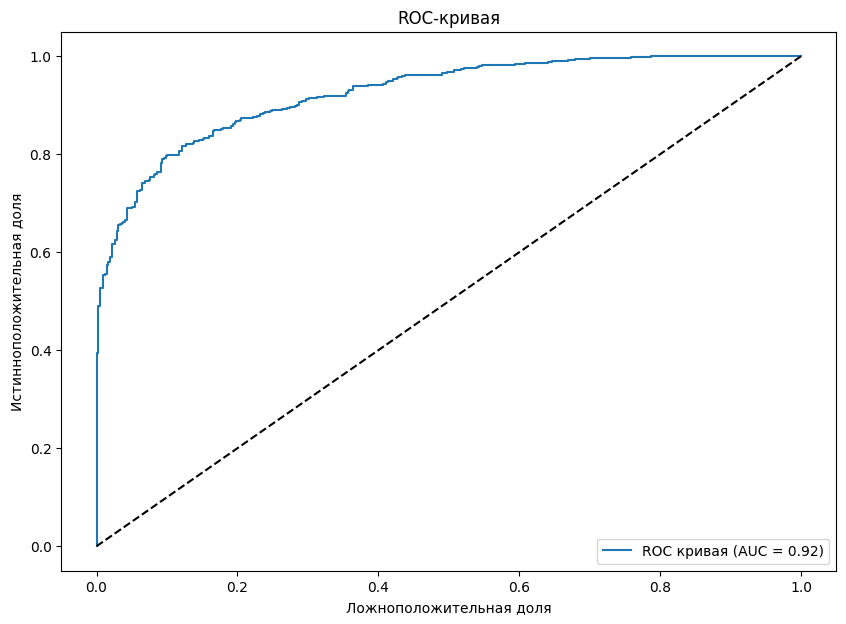

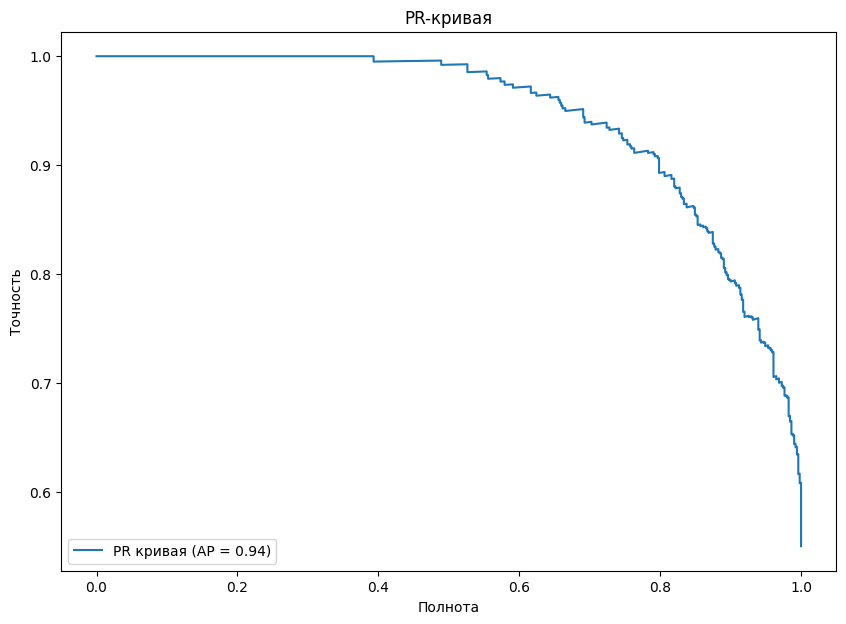

In [67]:

fpr, tpr, _ = roc_curve(y_true_classes, y_pred)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_true_classes, y_pred)
average_precision = average_precision_score(y_true_classes, y_pred)


plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Ложноположительная доля')
plt.ylabel('Истинноположительная доля')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()


plt.figure(figsize=(10, 7))
plt.plot(recall, precision, label=f'PR кривая (AP = {average_precision:.2f})')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('PR-кривая')
plt.legend(loc='lower left')
plt.show()

# LSTM нейронные сети с word2vec (Матрица эмбеддинга)

In [68]:
import pickle
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens'])
sequences = tokenizer.texts_to_sequences(df['tokens'])
X_tokenizer = pad_sequences(sequences, maxlen=MAX_LEN)

word_index=tokenizer.word_index
print('Уникальные слова:',len(word_index))
MAX_LEN

Уникальные слова: 39406


200

In [69]:

vocab_size = len(tokenizer.word_index)+ 1
embedding_matrix = np.zeros((vocab_size, MAX_LEN))
for word, i in tokenizer.word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08607563,  0.17500916, -0.04352096, ..., -0.04997642,
        -0.02276156, -0.10620302],
       [ 0.01669547,  0.02495873, -0.06816026, ..., -0.1834909 ,
         0.21634811,  0.17086107],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [70]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])


In [71]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [72]:
model_filename = 'dense7_class.keras'
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,
                           patience=5, verbose=1, mode='auto')
chkpt = ModelCheckpoint(model_filename,
                        monitor='val_loss',
                        verbose=1,
                        save_best_only=True,
                        mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

callbacks = [early_stop, chkpt, reduce_lr]

In [73]:

X_train, X_test, y_train, y_test = train_test_split(X_tokenizer, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f'Веса классов: {class_weights_dict}')
np.shape(X_train)

Веса классов: {0: 1.096407927332783, 1: 0.9191761855313257}


(5311, 200)

In [74]:
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D, BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=MAX_LEN, weights=[embedding_matrix], input_shape=(X_train.shape[1],), trainable=False))
model_lstm.add(Bidirectional(LSTM(128, kernel_regularizer=l2(0.001))))
model_lstm.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

/home/jupyter/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
opt = Adam(learning_rate=0.001)
model_lstm.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 200)       │     7,881,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       336,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,317,113 (31.73 MB)

 Trainable params: 435,713 (1.66 MB)

 Non-trainable params: 7,881,400 (30.07 MB)

In [76]:
history = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, class_weight=class_weights_dict, batch_size=512, callbacks=callbacks)

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.6691 - loss: 1.4234
Epoch 1: val_loss improved from inf to 1.17831, saving model to dense7_class.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 692ms/step - accuracy: 0.6726 - loss: 1.4160 - val_accuracy: 0.7845 - val_loss: 1.1783 - learning_rate: 0.0010
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.8010 - loss: 1.0579
Epoch 2: val_loss improved from 1.17831 to 0.95125, saving model to dense7_class.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 646ms/step - accuracy: 0.8011 - loss: 1.0544 - val_accuracy: 0.7945 - val_loss: 0.9512 - learning_rate: 0.0010
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.8186 - loss: 0.8870
Epoch 3: val_loss improved from 0.95125 to 0.86005, saving model to dense7_class.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 631ms/step - accuracy: 0.8185 - loss: 0.8858 - val_accuracy: 0.7995 - val_loss: 0.8600 - learning_rate: 0.0010
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accurac

In [77]:

loss, accuracy = model_lstm.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


Test loss: 0.508
Test accuracy: 0.829


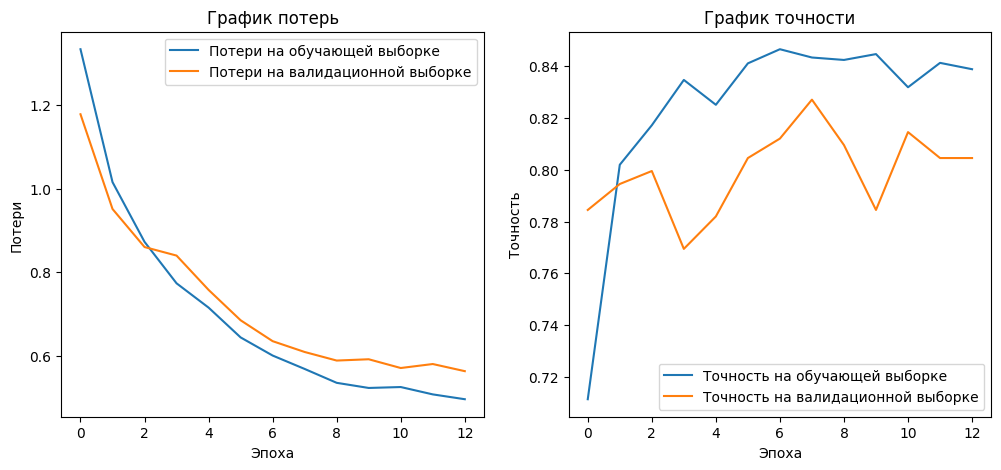

In [78]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('График потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
              precision    recall  f1-score   support

    negative       0.76      0.90      0.83       418
    positive       0.90      0.77      0.83       511

    accuracy                           0.83       929
   macro avg       0.83      0.84      0.83       929
weighted avg       0.84      0.83      0.83       929

F-score: 0.8291378943309583
Accuracy: 0.8288482238966631


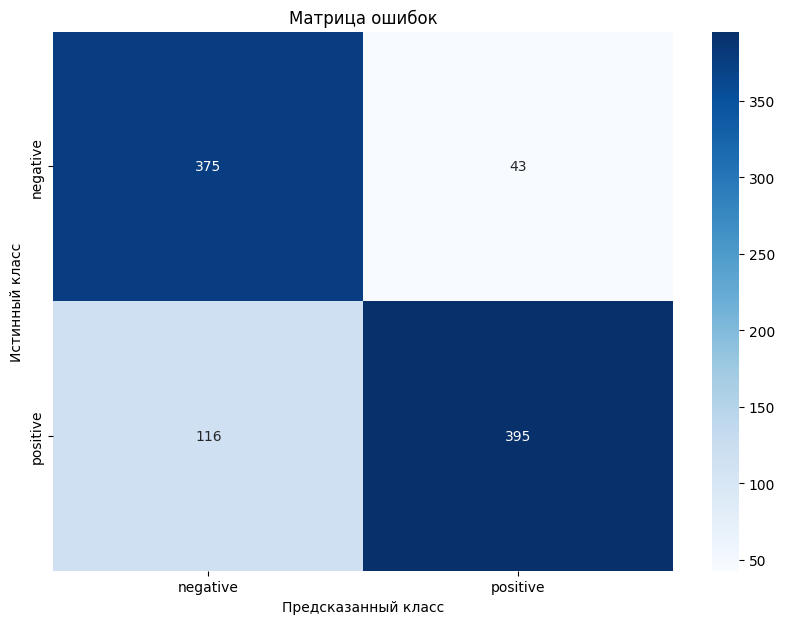

In [79]:
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model_lstm.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) 


y_true_classes = y_test 


class_names = encoder.classes_


print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


f_score = f1_score(y_true_classes, y_pred_classes, average='weighted')
accuracy_w2v = accuracy_score(y_true_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

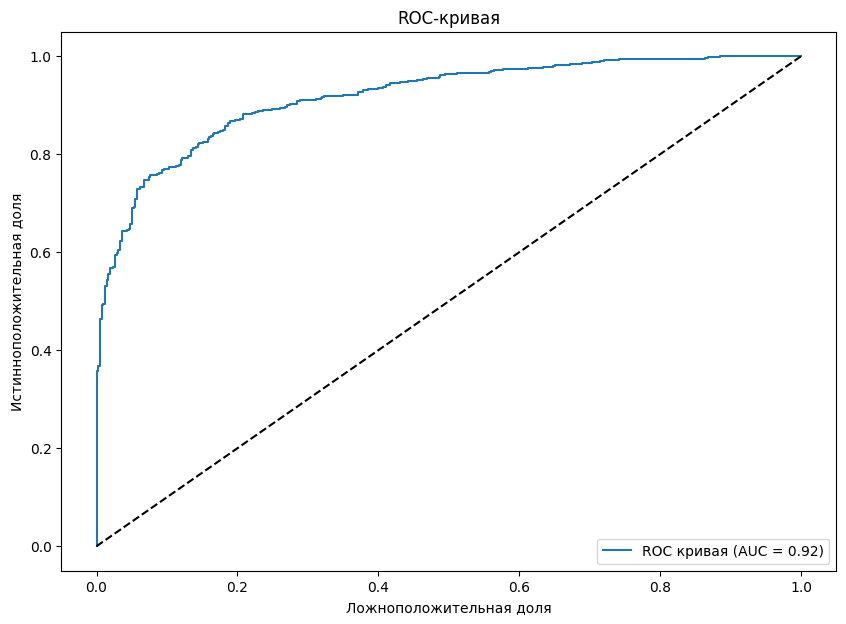

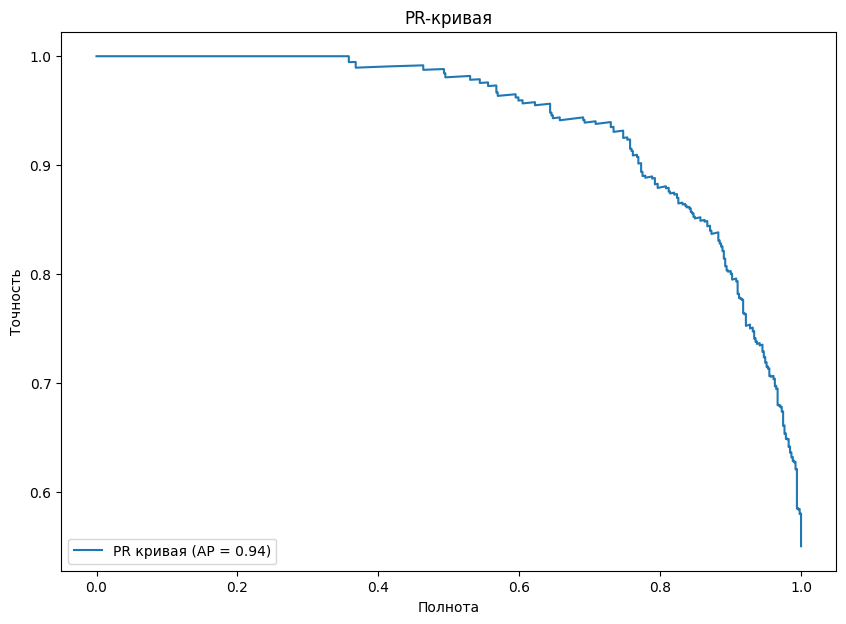

In [80]:

fpr, tpr, _ = roc_curve(y_true_classes, y_pred)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_true_classes, y_pred)
average_precision = average_precision_score(y_true_classes, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Ложноположительная доля')
plt.ylabel('Истинноположительная доля')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, label=f'PR кривая (AP = {average_precision:.2f})')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('PR-кривая')
plt.legend(loc='lower left')
plt.show()